# Take-Home Challenge: Ultimate Technologies Inc. 

Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

This challenge consists of three parts. Part 1 - exploratory data analysis, Part 2 - experiment and metric design, Part 3 - predictive modelling.

### Part 1 

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
df = pd.read_json(r"logins.json")
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# create a column for number of logins
df['count'] = 1
# convert to datetime, and set it as index
df['login_time'] = pd.to_datetime(df['login_time'], unit = 's')
df = df.set_index(df['login_time'])[['count']]
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [6]:
# aggregate into 15-minute intervals
df_15 = df.resample('15min').sum().replace(np.nan, 0)
df_15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Overall trends

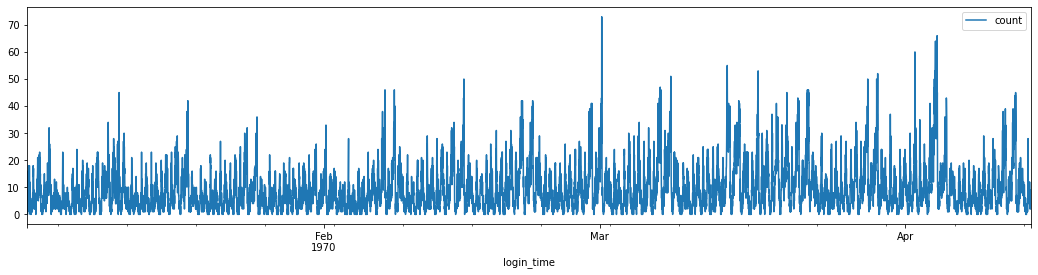

In [7]:
df_15.plot(kind='line',figsize=(18,4))

In [8]:
df_15.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


Weekly trends

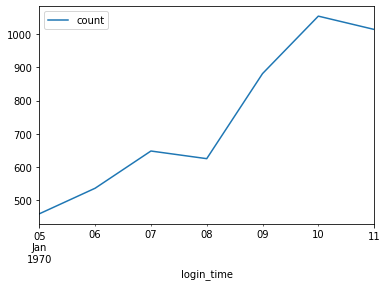

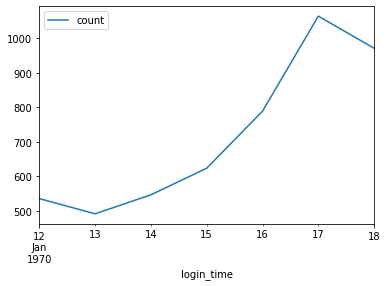

In [9]:
# daily logins from Monday to Sunday of first two weeks
df_daily = df.resample('D').sum()
df_daily['1970-01-05':'1970-01-11'].plot(figsize=(6,4))
df_daily['1970-01-12':'1970-01-18'].plot(figsize=(6,4))

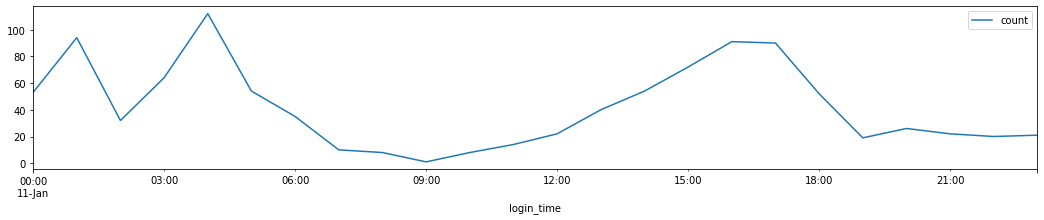

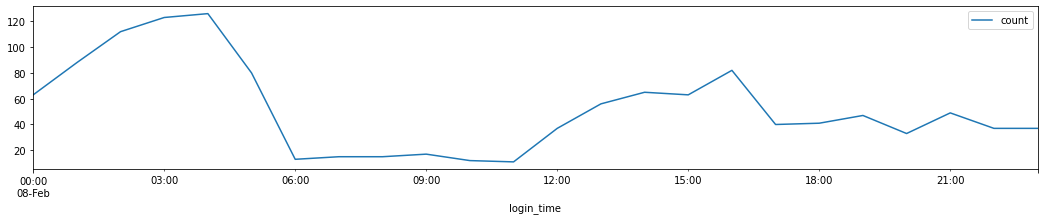

In [10]:
# hourly logins for Saturday of first two months
df_hourly = df.resample('H').sum()
df_hourly['1970-01-11'].plot(figsize=(18,3))
df_hourly['1970-02-08'].plot(figsize=(18,3))

### Major Trends
1. The data reaches a peak every 12 hours, one in the morning and the other in the afternoon. 
2. Most activities occurred during weekends. We can see that Saturdays usually have the highest number of logins, while Mondays and Tuesdays have the lowest number of logins, and the number is growing throughout the week. If we exam the weekend login details, we see that most logins happen from midnight to 4 am which is uncommon. However, there are minimal activities from 6am to 10am. After 12pm, the activity starts to rise and reaches a peak at around 4pm.
3. The biggest data issue was that the login times were randomly recorded, and the data has been sorted.

### Part 2

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

I would choose a series of measures to evaluate the experiment: the average number of times a driver crosses the toll bridge and the average wait time (time difference between rider request and driver arrival). The first metric is easy to calculate, so the system would note when a driver uses the toll bridge. The more times a driver uses the toll bridge, the better rewards for example, the driver would get. In this way, it would encourage drivers to be available in both cities. Also, I would check for the average wait time in either city that each user would be matched to a driver within a fair amount of time. The wait time in either city should not vary by much. Suppose a city is active and the other is not, then the system would encourage more drivers to the active city so the driver partners would be availble in both cities as opposed to be exclusive to each city.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    a. how you will implement the experiment
    b. what statistical test(s) you will conduct to verify the significance of the observation
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
    
I would conduct an A/B testing on pre vs post toll ridership. I would set up a period of time, say two weeks, where the toll ocst remain the same and two weeks where the toll costs are reimbursed. The length of these periods would depend on the budget and resources, but would be longer than one week. I would develop hypothesis testing and compare metrics for these two periods of time. For example, the null hypothesis testing for the first metric could be that there was no difference between the average number of times a driver uses the toll bridge. The alternative hypothesis could be, for example, the average number of uses would improve by 3 times per day. I would first pick a group of for example 100 drivers and equal number of drivers to each city and count their toll bridge usage under both conditions, and conduct a paired-sample t-test. Or, I would use a Welch's t-test if I chose to simply compare the means for drivers from different cities. In either case, I would look at the p-value, and if obtained p-value is less than 0.05, then it is sufficient to reject the null hypothesis and conclude that the average number of uses would by by 3 times per day, that is, the reimbursement program works. The next step would be to consider cost of reimbursement and profits.

### Part 3

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

    I filled missing ratings by mean or median, and dropped rows that have missing phone information. I created a new feature called "active" which labels a user as active if the user has ride in last 30 days (note: the earliest signup date is 2014-01-01 and the lastest trip date is 2014-07-01, so the preceding 30 days from the lastest trip date suffices in this case). Based on the countplot, we see that 37.64% of all users are active in the past 30 days, that is, 37.64% of all users are retained.


2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

    I first did some data cleaning and feature engineering to make the data more usable. I then split the data into training and testing set, set the target variable to be 'active', and developed a logistic regression model. The model accuracy was 96.5% and that will be useful. The reason why I didn't try more complex models is that the logistic model already provides sufficient and important insights for the company, there's no need to try other ones. 
    

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention 

    Through the top 5 most important features, we can see that the following factors effect the activity of a user: \
    **Average Rating By Drivers**: negatively correlated with active level, as rating goes up, the likelihood of being active users goes down \
    **Average Surge**: as the average surge multiplier over all of this user’s trips increases, the likelihood goes down \
    **Average Rating of Drivers**: as the rating goes up, the likelihood drops \
    **Ultimate Black User**: positively correlated with active level, if a user took a Ultimate Black in their first 30 days, the likelihood of being active in 6th month increases \
    **Phone**: primary device is positively correlated with active level
    
    Based on these information, several recommendations to increase the chance of being more active:
    1. Encourage both drivers and riders not to overrate or inflate the ratings.
    2. Provide incentives for users to use Ultimate Black

In [29]:
with open("ultimate_data_challenge.json", "r") as read_file:
    data_ultimate = json.load(read_file)

df_ultimate = pd.DataFrame(data_ultimate)
df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [30]:
df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [31]:
df_ultimate.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [32]:
df_ultimate[['signup_date', 'last_trip_date']].describe()

,signup_date,last_trip_date
count,50000,50000
unique,31,182
top,2014-01-18,2014-06-29
freq,2948,2036


#### Data Cleaning, EDA, Feature Engineering

In [33]:
# fill missing values by mean
df_ultimate['avg_rating_by_driver'] = df_ultimate['avg_rating_by_driver'].fillna(4.778158)

# fill missing values by median
df_ultimate['avg_rating_of_driver'] = df_ultimate['avg_rating_of_driver'].fillna(4.9)

In [34]:
# drop NAs by phone
df_ultimate = df_ultimate.dropna()
df_ultimate.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [35]:
# convert date into datetime 
signup_date = df_ultimate['signup_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [36]:
# convert last_trip_date into datetime
last_trip_date = df_ultimate['last_trip_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [37]:
print(last_trip_date.max())
print(signup_date.min())

2014-07-01 00:00:00
2014-01-01 00:00:00


In [38]:
# find current date
current = last_trip_date.max()
# create a feature 'active', denote as 1 if a user is active for the last 30 days and 0 if not
df_ultimate['active'] = last_trip_date.apply(lambda d: 0 if (current - d).days > 30 else 1)
df_ultimate['active'].head()

0    1
1    0
2    0
3    1
4    0
Name: active, dtype: int64

In [39]:
len(df_ultimate[df_ultimate['active']==1])/len(df_ultimate['active'])

0.37640109668575117

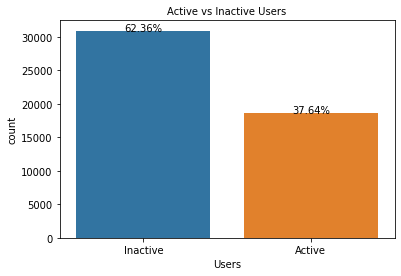

In [40]:
total = float(len(df_ultimate))

g1 = sns.countplot(x='active', data=df_ultimate)
g1.set_title("Active vs Inactive Users", fontsize=10)
g1.set_xlabel("Users")
g1.set_xticklabels(['Inactive', 'Active'], fontsize=10)

for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 

We see that 37.64% of all users are active in the past 30 days, and in particular, only 31.30% iPhone users and 6.34% of Android users are active in the past 30 days.

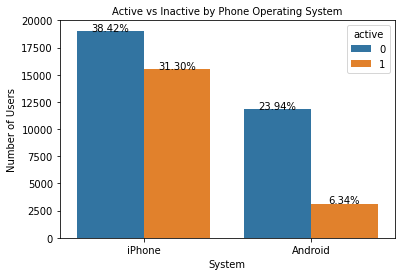

In [41]:
g2 = sns.countplot(x='phone', hue='active', data=df_ultimate)
g2.set_title("Active vs Inactive by Phone Operating System", fontsize=10)
g2.set_xlabel("System", fontsize=10)
g2.set_ylabel("Number of Users", fontsize=10)

for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10)

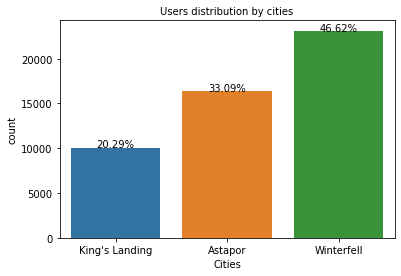

In [42]:
g3 = sns.countplot(x='city', data=df_ultimate)
g3.set_title("Users distribution by cities", fontsize=10)
g3.set_xlabel("Cities")
#g3.set_xticklabels(['Inactive', 'Active'], fontsize=10)

for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 

46.62% of all users are from Winterfell, 33.09% from Astapor, and 20.29% from King's Landing. Astapor has much more inactive users then active users, while King's Landing has more active users then inactive users.

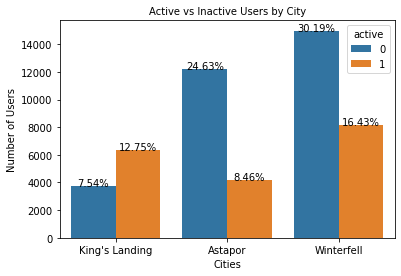

In [43]:
g4 = sns.countplot(x='city', hue='active', data=df_ultimate)
g4.set_title("Active vs Inactive Users by City", fontsize=10)
g4.set_xlabel("Cities", fontsize=10)
g4.set_ylabel("Number of Users", fontsize=10)

for p in g4.patches:
    height = p.get_height()
    g4.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10)

The following are distribution plots of each feature.

Text(0.5, 1.0, 'Avg Surge distribution')

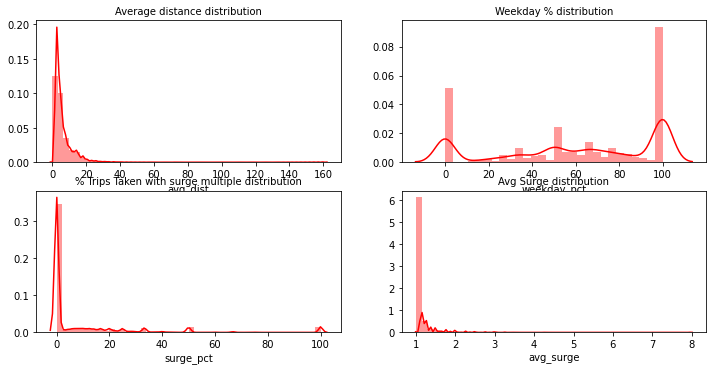

In [44]:
plt.figure(figsize=(12,12))

plt.subplot(421)
p1 = sns.distplot(df_ultimate['avg_dist'], color='r')
p1.set_title('Average distance distribution', fontsize=10)
#p1.set_xlim([min(np.log(f['TransactionAmt'])), max(np.log(f['TransactionAmt']))])

plt.subplot(422)
p2 = sns.distplot(df_ultimate['weekday_pct'], color='r')
p2.set_title('Weekday % distribution', fontsize=10)

plt.subplot(423)
p3 = sns.distplot(df_ultimate['surge_pct'], color='r')
p3.set_title('% Trips Taken with surge multiple distribution', fontsize=10)

plt.subplot(424)
p3 = sns.distplot(df_ultimate['avg_surge'], color='r')
p3.set_title('Avg Surge distribution', fontsize=10)

Text(0.5, 1.0, 'First 30 days trips distribution')

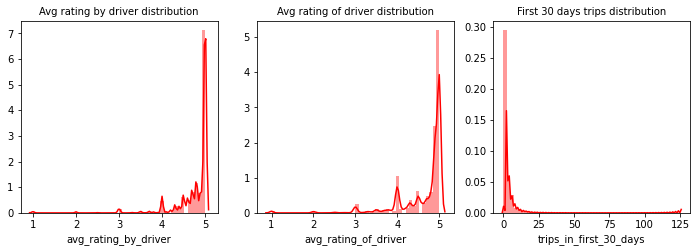

In [45]:
plt.figure(figsize=(12,12))

plt.subplot(331)
p3 = sns.distplot(df_ultimate['avg_rating_by_driver'], color='r')
p3.set_title('Avg rating by driver distribution', fontsize=10)

plt.subplot(332)
p3 = sns.distplot(df_ultimate['avg_rating_of_driver'], color='r')
p3.set_title('Avg rating of driver distribution', fontsize=10)

plt.subplot(333)
p3 = sns.distplot(df_ultimate['trips_in_first_30_days'], color='r')
p3.set_title('First 30 days trips distribution', fontsize=10)

In [46]:
print(df_ultimate.dtypes)

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
active                      int64
dtype: object


In [47]:
# encoding categorical data
df_ultimate['ultimate_black_user'] = df_ultimate['ultimate_black_user'].astype(int)

from sklearn.preprocessing import LabelEncoder
for col in df_ultimate.columns:
    if df_ultimate[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(df_ultimate[col].astype(str).values))
        df_ultimate[col] = le.transform(list(df_ultimate[col].astype(str).values))

In [48]:
print(df_ultimate.dtypes)

city                        int64
trips_in_first_30_days      int64
signup_date                 int64
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date              int64
phone                       int64
surge_pct                 float64
ultimate_black_user         int64
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
active                      int64
dtype: object


#### Preprocessing and Modelling

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

In [50]:
X = df_ultimate.drop(['active'], axis=1)
y = df_ultimate['active']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [54]:
import warnings
warnings.filterwarnings('ignore')

We will apply the most basic model - logistic regression

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6259
           1       0.94      0.96      0.95      3662

    accuracy                           0.96      9921
   macro avg       0.96      0.96      0.96      9921
weighted avg       0.97      0.96      0.97      9921



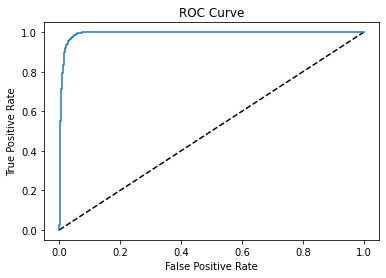

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [60]:
# cross validation scores
print(np.mean(cross_val_score(lr,X_test,np.ravel(y_test),cv=5)))

0.9634113715771513


Text(0.5, 0, 'Relative Feature Importance')

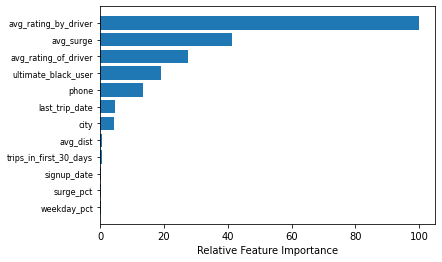

In [59]:
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

In [61]:
lr.score(X_test,y_test)

0.9649228908376172

Accuracy 0.965 \
Top features and its coefficients: \
Negative correlations: avg_rating_by_driver, avg_surge, avg_rating_of_driver, city \
Positive correlations: ultimate_black_user, phone, last_trip_date

In [67]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
print(coefficients)

                         0         0
0                     city -0.182305
1   trips_in_first_30_days -0.020673
2              signup_date -0.016339
3     avg_rating_of_driver -1.191923
4                avg_surge -1.787340
5           last_trip_date  0.201546
6                    phone  0.585755
7                surge_pct  0.014318
8      ultimate_black_user  0.819062
9              weekday_pct -0.008545
10                avg_dist  0.022122
11    avg_rating_by_driver -4.325292
